<a href="https://colab.research.google.com/github/Maitreyeej/Food_Sales_Prediction/blob/main/Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Imports and Creating a Dataframe**

In [90]:
from google.colab import drive        #Mounting the drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [91]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

filename = '/content/drive/MyDrive/CODING_DOJO/WEEK2/sales_predictions.csv'
sales_prediction_df=pd.read_csv(filename)         #importing and reading the data into panda dataframe
sales_prediction_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# **Preprocessing**

In [93]:
sales_prediction_df.info()            #Checking the data details

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


***To clean the data, we will check for any duplicates and also the missing data in a data frame. We will delete the duplicated data. We will also check for unit consistencies. We will either eliminate or fill in the missing data.***

***Cleaning up data which can be used is essential to get good results.***

In [94]:
sales_prediction_df.shape   #checking the shape of the dataframe

(8523, 12)

***Two columns have missing values.***

***Column Names: Item_Weight, Outlet_Size***


In [95]:
sales_prediction_df.isna().sum()        #getting the sum of the missing values in each column

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
                             ... 
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Length: 12, dtype: int64

In [96]:
sales_prediction_df.duplicated().any()        #checking if there is any duplicated data

False

In [97]:
sales_prediction_df['Item_Weight'].value_counts()    #calculating most occured value in Item Weights column

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.560      2
9.420      1
5.400      1
6.520      1
7.685      1
Name: Item_Weight, Length: 415, dtype: int64

In [98]:
sales_prediction_df['Outlet_Size'].value_counts()       #calculating most occured value in Outlet Size column

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [99]:
#Getting statistics on the Item_Weight column
sales_prediction_df['Item_Weight'].min()          #getting the minimum of the Item Weight

4.555

In [100]:
sales_prediction_df['Item_Weight'].max()        #getting the maximum of the Item Weight

21.35

In [101]:
Weight_mean=sales_prediction_df['Item_Weight'].mean()         #calculating the mean of Item Weight column
print(Weight_mean)

12.857645184136183


In [102]:
pd.set_option('display.max_rows', 10)
sales_prediction_df.groupby(['Item_Weight',  'Outlet_Size'])[['Outlet_Size']].count()         #checking if the grouping by Item Weight and Outlet Size give an insight on value to be filled 

Outlet_Size
Item_Weight Outlet_Size             
4.555       High                   1
            Medium                 1
            Small                  2
4.590       High                   1
            Medium                 1
...                              ...
21.250      Medium                 7
            Small                  5
21.350      High                   1
            Medium                 2
            Small                  2

[1082 rows x 1 columns]

In [103]:
sales_prediction_temp_df=sales_prediction_df.loc[(sales_prediction_df['Item_Weight']>12) & (sales_prediction_df['Item_Weight']<13)]   #checking in detail between 12 and 13 because of the mean of the column
sales_prediction_temp_df.groupby(['Item_Weight',  'Outlet_Size'])[['Outlet_Size']].count()  #checking the Outlet Size for the Item Weight between 12 and 13

Outlet_Size
Item_Weight Outlet_Size             
12.10       High                   6
            Medium                17
            Small                 12
12.15       High                  11
            Medium                26
...                              ...
12.80       Medium                 7
            Small                  6
12.85       High                   7
            Medium                16
            Small                 12

[27 rows x 1 columns]

In [104]:
#checking if the missing values rows can be dropped
Weight_missing=sales_prediction_df['Item_Weight'].isna()          #checking if the data missing is for the overlapping data points or different data points
Outlet_missing=sales_prediction_df['Outlet_Size'].isna()
sales_prediction_df.loc[(Weight_missing & Outlet_missing),('Item_Weight', 'Outlet_Size')]

,Item_Weight,Outlet_Size


***Since there are no overlapping missing values, if we decide to eliminate the values, we will end up missing total of 3873 values which is about 45% of the data. So eliminating the data is not an option.***

# **Filling in the missing data**

In [105]:
sales_prediction_df['Item_Weight'].fillna(Weight_mean, inplace=True)   #Filling in the data in 'Item_Weight' Column by the way of filling in the mean value of the column

***'Item_Weight' column is filled in by the mean value of the column. Mean value is around 12.85. Mode / most occured value of the column is also 12.15. This value is close to the value of mean as well.***

In [106]:
sales_prediction_df.info()        #verifying that the missing values in column 'Item_Weight' are filled 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [107]:
sales_prediction_df['Outlet_Size'].fillna('Medium', inplace=True)  
#Filling in the missing values in Outlet Size as the most occured value in the range of 12 to 13 Item Weight

***Based on the grouped analysis as per the Item Weight between 12 and 13. As the most occured values are around 12 and 13, Outlet Size estimation is based on the grouped analysis. As most occured Outlet Size value is medium, missing field is filled with that value.***

In [108]:
sales_prediction_df.info()        #making sure there are no missing values anymore

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


***OBSERVATIONS***

***1. Data types for all the columns seems to be correct.***

***2.Missing Values only in 2 columns.***

***3.This data is from between the year 1985 and 2009.***

# **Checking for inconsistencies and fix it**

In [109]:
#verifying for the irregularities for all the columns

In [110]:
sales_prediction_df['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
FDW26     9
FDP25     9
NCB18     9
         ..
DRF48     1
FDO33     1
FDT35     1
FDY43     1
FDE52     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [111]:
sales_prediction_df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [112]:
sales_prediction_df['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [113]:
sales_prediction_df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [114]:
sales_prediction_df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [115]:
sales_prediction_df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

***This shows us that there are inconsistencies in the data in the column "Item_Fat_Content". Low Fat is entered as Low Fat and also as LF, low Fat. Regular is entered as Regular and also reg. We will need to be careful while dealing with this data.***

In [116]:
#Fixing the irregularities in the column of 'Item_Fat_Content'
sales_prediction_df=sales_prediction_df.replace({'Item_Fat_Content' : { 'LF' : 'Low Fat', 'low fat' : 'Low Fat', 'reg' : 'Regular'}})   
sales_prediction_df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [117]:
sales_prediction_df['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [118]:
sales_prediction_df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT046    930
OUT049    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

# **Understanding the data and visualisation of the data**

In [119]:
#checking to see if there is a trend in the sales based on the outlets established in an year
sales_prediction_df_TotalSales=sales_prediction_df.groupby(['Outlet_Establishment_Year'])['Item_Outlet_Sales'].sum()       #plotting for sales in the years of establishment

In [120]:
X1_sales=sales_prediction_df_TotalSales.index
Y1_sales=sales_prediction_df_TotalSales.values

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


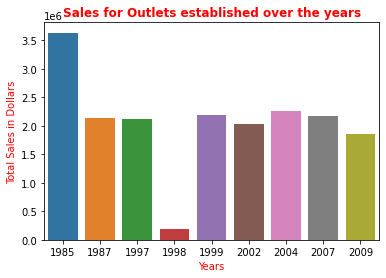

In [121]:
sns.barplot(X1_sales, Y1_sales)
plt.title('Sales for Outlets established over the years', fontweight='bold', c='red')
plt.ylabel('Total Sales in Dollars', c='red')
plt.xlabel('Years', c='red');


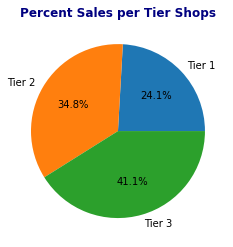

In [122]:
sales_prediction_df_tier=sales_prediction_df.groupby(['Outlet_Location_Type'])['Item_Outlet_Sales'].sum()     #Plotting a pie chart with the share of sales as per the location
Pie_Tier=sales_prediction_df_tier.values
Pie_Tier_Lable= sales_prediction_df_tier.index
temp=Pie_Tier.sum()

for ele in Pie_Tier:
   ele=ele/temp*100

plt.title('Percent Sales per Tier Shops', c='navy', fontweight='bold')
plt.pie(Pie_Tier, autopct='%1.1f%%', labels= Pie_Tier_Lable );

In [123]:
sales_prediction_df_outlets=sales_prediction_df.groupby(['Outlet_Establishment_Year']) ['Outlet_Identifier'].count()      #Plot for no. of outlets established over the years

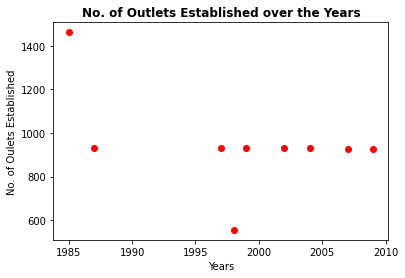

In [124]:
outlets_X=sales_prediction_df_outlets.index
outlets_Y=sales_prediction_df_outlets.values
plt.title('No. of Outlets Established over the Years', fontweight='bold')
plt.xlabel('Years')
plt.ylabel('No. of Oulets Established')
plt.scatter(outlets_X, outlets_Y, c='red');

***Number of outlets established seems to have plateued at around 930. A sudden dip in number of outlets was seen in the year 1998 to 555.***

In [125]:
sales_prediction_df_outletSize=sales_prediction_df.groupby(['Outlet_Size'])['Item_Outlet_Sales'].sum()        #Plotting for the sales as per the outlet size

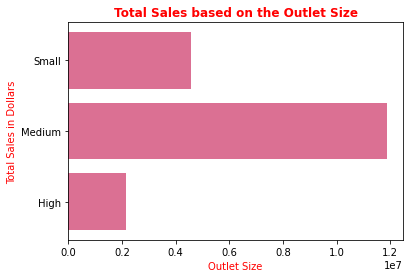

In [126]:
sales_prediction_df_outletSize
plt.barh(sales_prediction_df_outletSize.index, sales_prediction_df_outletSize.values, color='palevioletred')
plt.title('Total Sales based on the Outlet Size', fontweight='bold', c='red')
plt.ylabel('Total Sales in Dollars', c='red')
plt.xlabel('Outlet Size', c='red');

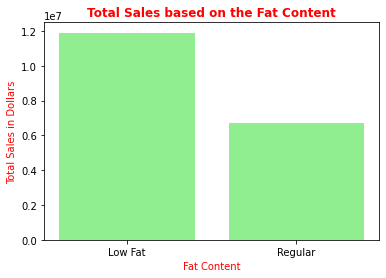

In [127]:
sales_prediction_df_fat=sales_prediction_df.groupby(['Item_Fat_Content'])['Item_Outlet_Sales'].sum()        #plotting for sales based on the fat content in food items
sales_prediction_df_fat
plt.bar(sales_prediction_df_fat.index, sales_prediction_df_fat.values, color='lightgreen')
plt.title('Total Sales based on the Fat Content', fontweight='bold', c='red')
plt.ylabel('Total Sales in Dollars', c='red')
plt.xlabel('Fat Content', c='red');

In [128]:
sales_prediction_df.corr()     #checking the correlation between the features

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


In [129]:
sales_prediction_df.corr().sort_values(by = ['Item_Outlet_Sales'])    #checking the correlation between the features based on the target column

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


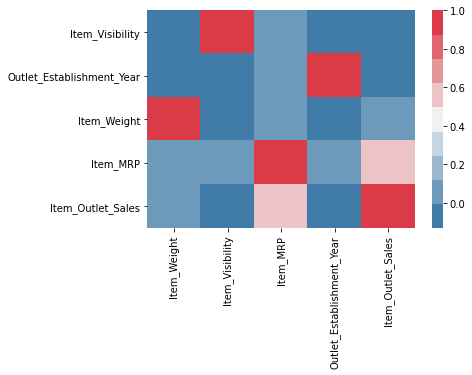

In [130]:
sns.heatmap(sales_prediction_df.corr().sort_values(by = ['Item_Outlet_Sales']), cmap = sns.diverging_palette(240, 10, n=9));         #checking the correlation between the features in the form of heat map for more clarity


***From this map, it is clear that columns 'Item_Weight' and 'Outlet_Establishment_Year' has almost no effect on 'Item_Outlet_Sales'. From the colors, we can conclude that these columns correlation is close to zero.***

In [131]:
sales_prediction_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,8483,8484,8485,8486,8487,8488,8489,8490,8491,8492,8493,8494,8495,8496,8497,8498,8499,8500,8501,8502,8503,8504,8505,8506,8507,8508,8509,8510,8511,8512,8513,8514,8515,8516,8517,8518,8519,8520,8521,8522
Item_Identifier,FDA15,DRC01,FDN15,FDX07,NCD19,FDP36,FDO10,FDP10,FDH17,FDU28,FDY07,FDA03,FDX32,FDS46,FDF32,FDP49,NCB42,FDP49,DRI11,FDU02,FDN22,FDW12,NCB30,FDC37,FDR28,NCD06,FDV10,DRJ59,FDE51,FDC14,FDV38,NCS17,FDP33,FDO23,DRH01,NCX29,FDV20,DRZ11,FDX10,FDB34,...,DRI11,DRJ49,DRK37,FDR20,DRG13,NCN14,FDV13,FDU44,FDO03,FDT34,FDP21,NCI54,FDE22,FDJ57,FDT08,NCP54,NCK53,NCQ42,FDW21,NCH43,FDQ44,NCN18,FDB46,DRF37,FDN28,FDW31,FDG45,FDN58,FDF05,FDR26,FDH31,FDA01,FDH24,NCJ19,FDF53,FDF22,FDS36,NCJ29,FDN46,DRG01
Item_Weight,9.3,5.92,17.5,19.2,8.93,10.395,13.65,12.8576,16.2,19.2,11.8,18.5,15.1,17.6,16.35,9,11.8,9,12.8576,13.35,18.85,12.8576,14.6,12.8576,13.85,13,7.645,11.65,5.925,12.8576,19.25,18.6,18.7,17.85,17.5,10,12.8576,8.85,12.8576,12.8576,...,8.26,6.865,12.8576,20,12.8576,12.8576,17.35,12.8576,10.395,9.3,7.42,15.2,9.695,7.42,13.65,15.35,11.6,20.35,5.34,8.42,20.5,12.8576,10.5,17.25,5.88,11.35,8.1,13.8,17.5,20.7,12,15,20.7,18.6,20.75,6.865,8.38,10.6,7.21,14.8
Item_Fat_Content,Low Fat,Regular,Low Fat,Regular,Low Fat,Regular,Regular,Low Fat,Regular,Regular,Low Fat,Regular,Regular,Regular,Low Fat,Regular,Low Fat,Regular,Low Fat,Low Fat,Regular,Regular,Low Fat,Low Fat,Regular,Low Fat,Regular,Low Fat,Regular,Regular,Low Fat,Low Fat,Low Fat,Low Fat,Low Fat,Low Fat,Regular,Regular,Regular,Low Fat,...,Low Fat,Low Fat,Low Fat,Regular,Low Fat,Low Fat,Regular,Regular,Regular,Low Fat,Regular,Low Fat,Low Fat,Regular,Low Fat,Low Fat,Low Fat,Low Fat,Regular,Low Fat,Low Fat,Low Fat,Regular,Low Fat,Regular,Regular,Low Fat,Regular,Low Fat,Low Fat,Regular,Regular,Low Fat,Low Fat,Regular,Low Fat,Regular,Low Fat,Regular,Low Fat
Item_Visibility,0.0160473,0.0192782,0.0167601,0,0,0,0.0127411,0.12747,0.0166871,0.0944496,0,0.0454638,0.100014,0.0472573,0.0680243,0.069089,0.00859605,0.0691964,0.0342377,0.102492,0.13819,0.0353999,0.0256981,0.057557,0.0258965,0.0998871,0.0666934,0.0193561,0.161467,0.0722218,0.170349,0.0808294,0,0,0.097904,0.0892911,0.0595118,0.113124,0.123111,0.026481,...,0.0344741,0,0.0437916,0,0.0370061,0.0914727,0.0277233,0.102296,0.0370332,0.17435,0.0258864,0,0.0295672,0.0216957,0.0492092,0.0352929,0.0375741,0,0.00599762,0.070712,0.0361335,0.124111,0.0941458,0.0846762,0.0302422,0.0432456,0.214306,0.0568616,0.0269804,0.0428011,0.0204073,0.0544885,0.0215184,0.118661,0.0836066,0.0567834,0.0469824,0.0351863,0.145221,0.0448783
Item_Type,Dairy,Soft Drinks,Meat,Fruits and Vegetables,Household,Baking Goods,Snack Foods,Snack Foods,Frozen Foods,Frozen Foods,Fruits and Vegetables,Dairy,Fruits and Vegetables,Snack Foods,Fruits and Vegetables,Breakfast,Health and Hygiene,Breakfast,Hard Drinks,Dairy,Snack Foods,Baking Goods,Household,Baking Goods,Frozen Foods,Household,Snack Foods,Hard Drinks,Dairy,Canned,Dairy,Health and Hygiene,Snack Foods,Breads,Soft Drinks,Health and Hygiene,Fruits and Vegetables,Soft Drinks,Snack Foods,Snack Foods,...,Hard Drinks,Soft Drinks,Soft Drinks,Fruits and Vegetables,Soft Drinks,Others,Canned,Fruits and Vegetables,Meat,Snack Foods,Snack Foods,Household,Snack Foods,Seafood,Fruits and Vegetables,Household,Health and Hygiene,Household,Snack Foods,Household,Fruits and Vegetables,Household,Snack Foods,Soft Drinks,Frozen Foods,Fruits and Vegetables,Fruits and Vegetables,Snack Foods,Frozen Foods,Dairy,Meat,Canned,Baking Goods,Others,Frozen Foods,Snack Foods,Baking Goods,Health and Hygiene,Snack Foods,Soft Drinks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

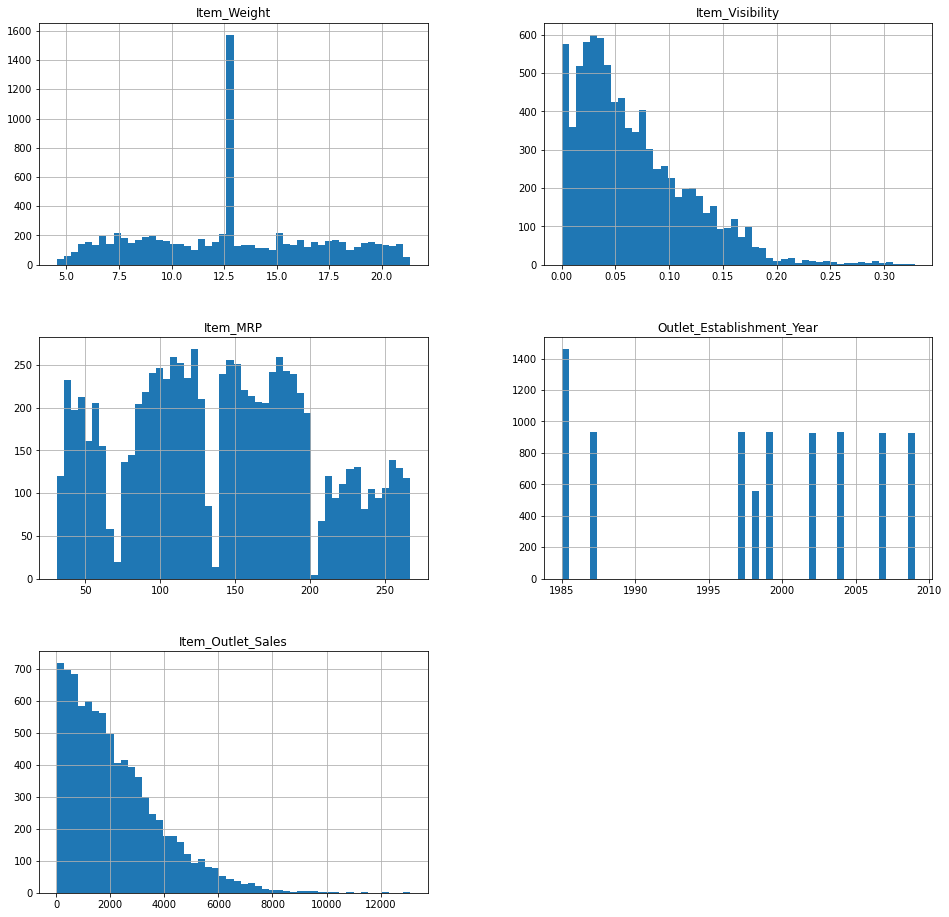

In [132]:
#checking the trends of the numerical features
sales_prediction_df.loc[:,:].hist(bins=50,
                 figsize=(16,16),
                 xlabelsize='10',
                 ylabelsize='10');


***There are no directly apparent inconsistencies in the data. We can utilize this data.***

In [133]:
#dropping the irrelevant columns
sales_prediction_df=sales_prediction_df.drop(columns=['Outlet_Establishment_Year', 'Outlet_Identifier', 'Item_Weight'])
sales_prediction_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,8483,8484,8485,8486,8487,8488,8489,8490,8491,8492,8493,8494,8495,8496,8497,8498,8499,8500,8501,8502,8503,8504,8505,8506,8507,8508,8509,8510,8511,8512,8513,8514,8515,8516,8517,8518,8519,8520,8521,8522
Item_Identifier,FDA15,DRC01,FDN15,FDX07,NCD19,FDP36,FDO10,FDP10,FDH17,FDU28,FDY07,FDA03,FDX32,FDS46,FDF32,FDP49,NCB42,FDP49,DRI11,FDU02,FDN22,FDW12,NCB30,FDC37,FDR28,NCD06,FDV10,DRJ59,FDE51,FDC14,FDV38,NCS17,FDP33,FDO23,DRH01,NCX29,FDV20,DRZ11,FDX10,FDB34,...,DRI11,DRJ49,DRK37,FDR20,DRG13,NCN14,FDV13,FDU44,FDO03,FDT34,FDP21,NCI54,FDE22,FDJ57,FDT08,NCP54,NCK53,NCQ42,FDW21,NCH43,FDQ44,NCN18,FDB46,DRF37,FDN28,FDW31,FDG45,FDN58,FDF05,FDR26,FDH31,FDA01,FDH24,NCJ19,FDF53,FDF22,FDS36,NCJ29,FDN46,DRG01
Item_Fat_Content,Low Fat,Regular,Low Fat,Regular,Low Fat,Regular,Regular,Low Fat,Regular,Regular,Low Fat,Regular,Regular,Regular,Low Fat,Regular,Low Fat,Regular,Low Fat,Low Fat,Regular,Regular,Low Fat,Low Fat,Regular,Low Fat,Regular,Low Fat,Regular,Regular,Low Fat,Low Fat,Low Fat,Low Fat,Low Fat,Low Fat,Regular,Regular,Regular,Low Fat,...,Low Fat,Low Fat,Low Fat,Regular,Low Fat,Low Fat,Regular,Regular,Regular,Low Fat,Regular,Low Fat,Low Fat,Regular,Low Fat,Low Fat,Low Fat,Low Fat,Regular,Low Fat,Low Fat,Low Fat,Regular,Low Fat,Regular,Regular,Low Fat,Regular,Low Fat,Low Fat,Regular,Regular,Low Fat,Low Fat,Regular,Low Fat,Regular,Low Fat,Regular,Low Fat
Item_Visibility,0.0160473,0.0192782,0.0167601,0,0,0,0.0127411,0.12747,0.0166871,0.0944496,0,0.0454638,0.100014,0.0472573,0.0680243,0.069089,0.00859605,0.0691964,0.0342377,0.102492,0.13819,0.0353999,0.0256981,0.057557,0.0258965,0.0998871,0.0666934,0.0193561,0.161467,0.0722218,0.170349,0.0808294,0,0,0.097904,0.0892911,0.0595118,0.113124,0.123111,0.026481,...,0.0344741,0,0.0437916,0,0.0370061,0.0914727,0.0277233,0.102296,0.0370332,0.17435,0.0258864,0,0.0295672,0.0216957,0.0492092,0.0352929,0.0375741,0,0.00599762,0.070712,0.0361335,0.124111,0.0941458,0.0846762,0.0302422,0.0432456,0.214306,0.0568616,0.0269804,0.0428011,0.0204073,0.0544885,0.0215184,0.118661,0.0836066,0.0567834,0.0469824,0.0351863,0.145221,0.0448783
Item_Type,Dairy,Soft Drinks,Meat,Fruits and Vegetables,Household,Baking Goods,Snack Foods,Snack Foods,Frozen Foods,Frozen Foods,Fruits and Vegetables,Dairy,Fruits and Vegetables,Snack Foods,Fruits and Vegetables,Breakfast,Health and Hygiene,Breakfast,Hard Drinks,Dairy,Snack Foods,Baking Goods,Household,Baking Goods,Frozen Foods,Household,Snack Foods,Hard Drinks,Dairy,Canned,Dairy,Health and Hygiene,Snack Foods,Breads,Soft Drinks,Health and Hygiene,Fruits and Vegetables,Soft Drinks,Snack Foods,Snack Foods,...,Hard Drinks,Soft Drinks,Soft Drinks,Fruits and Vegetables,Soft Drinks,Others,Canned,Fruits and Vegetables,Meat,Snack Foods,Snack Foods,Household,Snack Foods,Seafood,Fruits and Vegetables,Household,Health and Hygiene,Household,Snack Foods,Household,Fruits and Vegetables,Household,Snack Foods,Soft Drinks,Frozen Foods,Fruits and Vegetables,Fruits and Vegetables,Snack Foods,Frozen Foods,Dairy,Meat,Canned,Baking Goods,Others,Frozen Foods,Snack Foods,Baking Goods,Health and Hygiene,Snack Foods,Soft Drinks
Item_MRP,249.809,48.2692,141.618,182.095,53.8614,51.4008,57.6588,107.762,96.9726,187.821,45.5402,144.11,145.479,119.678,196.443,56.3614,115.349,54.3614,113.283,230.535,250.872,144.544,196.508,107.694,165.021,45.906,42.3112,39.1164,45.5086,43.6454,55.7956,96.4436,256.667,93.1436,174.874,146.71,128.068,122.539,36.9874,87.6198,...,117.083,129.965,189.053,46.4744,164.753,184.661,89.6856,162.355,227.935,104.496,189.187,110.491,160.492,185.358,150.005,124.573,100.004,125.168,100.436,216.419,120.176,111.754,210.824,263.191,101.799,199.474,213.99,231.598,262.591,178.303,99.9042,57.5904,157.529,58.7588,178.832,214.522,108.157,85.1224,103.133,75.467
Outlet_Size,Medium,Medium,Medium,Medium,High,Medium,High,Medium,Medium,Medium,Medium,Small,Medium,Small,High,Small,Medium,Medium,Medium,S

In [134]:
sales_prediction_df['Item_Type'].nunique()         #checking how many distinct values the coloumn has

16

In [135]:
sales_prediction_df['Outlet_Type'].value_counts()        #checking how many distinct values the coloumn has

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [136]:
sales_prediction_df['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
FDW26     9
FDP25     9
NCB18     9
         ..
DRF48     1
FDO33     1
FDT35     1
FDY43     1
FDE52     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [137]:
#sales_prediction_df['Outlet_Identifier'].nunique()

In [138]:
sales_prediction_df.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052


Categories:

Nominal: Item_Identifier, Item_Type, Outlet_Identifier, Outlet_Location_Type,  Item_Fat_Content, Outlet_Type

Ordinal: Outlet Size

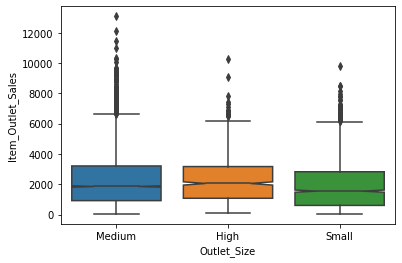

In [139]:
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=sales_prediction_df, notch=True);

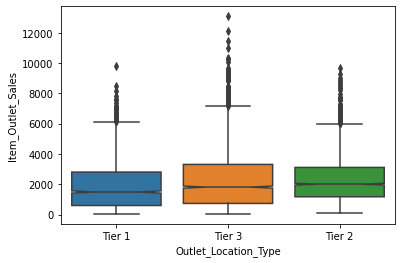

In [140]:
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=sales_prediction_df, notch=True);

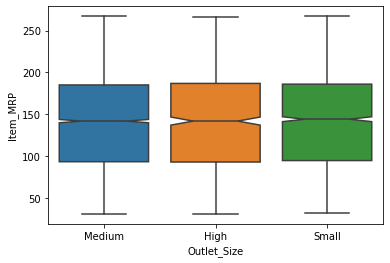

In [141]:
sns.boxplot(x='Outlet_Size', y='Item_MRP', data=sales_prediction_df, notch=True);

***This Box Plot tells us that there is no differentiation in the MRP of products in differnt sized outlets.***

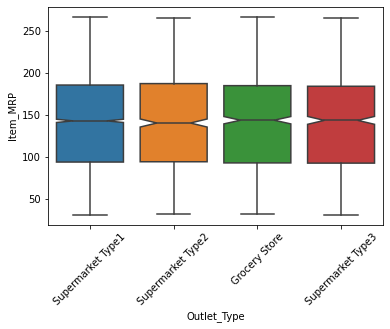

In [142]:
ax=sns.boxplot(x='Outlet_Type', y='Item_MRP', data=sales_prediction_df, notch=True);
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);                       #Thanks to https://stackoverflow.com/questions/44954123/rotate-xtick-labels-in-seaborn-boxplot

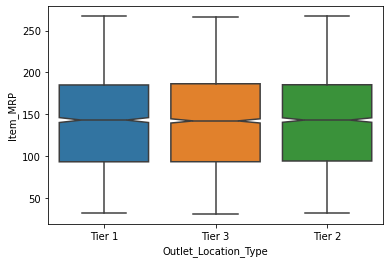

In [143]:
sns.boxplot(x='Outlet_Location_Type', y='Item_MRP', data=sales_prediction_df, notch=True);

# **Process the categorical data into numerical data**


Categories:
Nominal: Item_Identifier, Item_Type, Outlet_Identifier, Outlet_Location_Type, Outlet_Type, , Item_Fat_Content, Outlet Size


From all the categorical features, there is no feature which gives the obvious order and if one is necessarily better than the other. So we will treat all of them as Nominal

In [144]:
ohe = pd.get_dummies(sales_prediction_df, columns = ['Item_Type', 'Outlet_Type','Outlet_Location_Type','Item_Fat_Content','Outlet_Size'], drop_first = True)
ohe.head()


,Item_Identifier,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Item_Fat_Content_Regular,Outlet_Size_Medium,Outlet_Size_Small
0,FDA15,0.016047,249.8092,3735.1380,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,DRC01,0.019278,48.2692,443.4228,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,1,0
2,FDN15,0.016760,141.6180,2097.2700,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
3,FDX07,0.000000,182.0950,732.3800,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0
4,NCD19,0.000000,53.8614,994.7052,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [145]:
sales_prediction_df['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [146]:
#dict1={ 'Small': 0, 'Medium':1, 'High':2}
#dict2={'Regular':0, 'Low Fat':1}

#ohe['Outlet_Size']=ohe['Outlet_Size'].map(dict1)
#ohe['Item_Fat_Content']=ohe['Item_Fat_Content'].map(dict2)

ohe.head().T

,0,1,2,3,4
Item_Identifier,FDA15,DRC01,FDN15,FDX07,NCD19
Item_Visibility,0.0160473,0.0192782,0.0167601,0,0
Item_MRP,249.809,48.2692,141.618,182.095,53.8614
Item_Outlet_Sales,3735.14,443.423,2097.27,732.38,994.705
Item_Type_Breads,0,0,0,0,0
...,...,...,...,...,...
Outlet_Location_Type_Tier 2,0,0,0,0,0
Outlet_Location_Type_Tier 3,0,1,0,1,1
Item_Fat_Content_Regular,0,1,0,1,0
Outlet_Size_Medium,1,1,1,1,0


In [147]:
ohe=ohe.drop(['Item_Identifier'], axis=1)

In [148]:
y=ohe['Item_Outlet_Sales'].values
y.shape

(8523,)

In [149]:
x_temp=ohe.drop(['Item_Outlet_Sales'], axis=1)

In [150]:
X=x_temp.values
X.shape

(8523, 25)

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2) 

# Baseline Model

In [152]:
#Finding the mean of the target column
y_train.mean()

2165.9521864205253

In [153]:
print('Training RMSE:', np.sqrt(mean_squared_error(y_train, [y_train.mean()]*len(y_train))))          #Thanks Noelle for this code for setting the baseline model
print('Testing RMSE:', np.sqrt(mean_squared_error(y_test, [y_train.mean()]*len(y_test))))

Training RMSE: 1688.8379677877224
Testing RMSE: 1758.291431738524


# Linear Regression Model

In [154]:
#Linear Regression Model

In [155]:
LinReg=LinearRegression(fit_intercept=True)

In [156]:
LinReg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [157]:
y_pred_ln=LinReg.predict(X_test)

In [158]:
score = LinReg.score(X_test, y_test)
print("Linear Regression R2 score is", score)
print("RMSE for Linear Regression", np.sqrt(mean_squared_error(y_test, y_pred_ln)))


Linear Regression R2 score is 0.5604792733992208
RMSE for Linear Regression 1164.9736539807084


***Linear Regression does not give us the good result. R2 value of 0.56 is very low. We will try KNNRegressor model to find the values of the sales predicted.***

# KNN Regression Model

In [159]:
#KNN Regressor model

In [160]:
scaler = StandardScaler()           #standardising the data
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc=scaler.transform(X_test)

In [161]:
Reg = KNeighborsRegressor(n_neighbors= 3)     #creating an instant of KNeighborRegressor class
Reg.fit(X_train_sc,y_train)          #Creating a model

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [162]:
y_pred_knn=Reg.predict(X_test_sc)    #Calculating the predicted values
y_pred_knn

array([3187.8504    , 2619.2572    , 1628.99066667, ..., 2751.97333333,
       1351.574     , 1031.10226667])

In [163]:
score = Reg.score(X_test, y_test)
print("KNN Regression R2 score is", score)
print("RMSE for KNN Regression", np.sqrt(mean_squared_error(y_test, y_pred_knn)))

KNN Regression R2 score is -0.9773915053125758
RMSE for KNN Regression 1300.798608566662


# **Random Forest Regression**

In [164]:
clf = RandomForestRegressor(n_estimators=100,
                             bootstrap=True,
                             oob_score=True)

In [165]:
clf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [166]:
y_pred_rf=clf.predict(X_test)

In [167]:
score = clf.score(X_test, y_test)
print("Random Forest Regression R2 score is", score)
print("RMSE for Random Forest Regression", np.sqrt(mean_squared_error(y_test, y_pred_rf)))


Random Forest Regression R2 score is 0.5642673303272845
RMSE for Random Forest Regression 1159.9425645455572


In [168]:
from sklearn.model_selection import GridSearchCV    #Thanks Noelle for the insight
params = {'n_estimators': [10, 50, 100, 200],
          'max_depth': [None, 2, 3, 4, 5],
          'min_samples_split': [2, 3],
          'min_samples_leaf': [1, 2]}

#Fit the grid search
gs = GridSearchCV(RandomForestRegressor(), param_grid = params)
gs.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n

In [169]:
gs.best_params_

{'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 200}

In [170]:
y_pred_rfgs=gs.predict(X_test)
score = gs.score(X_test, y_test)
print("Random Forest Regression R2 score is", score)
print("RMSE for Random Forest Regression", np.sqrt(mean_squared_error(y_test, y_pred_rfgs)))

Random Forest Regression R2 score is 0.6033087651195673
RMSE for Random Forest Regression 1106.758143343933


# **Bagged Tree Regression**



In [171]:
clf1= BaggingRegressor(n_estimators=50,
                             bootstrap=True,
                             oob_score=True)

In [172]:
clf1.fit(X_train, y_train)
y_pred_bt=clf1.predict(X_test)

In [173]:
score = clf1.score(X_test, y_test)

In [174]:
print("Bagged Tree Regression R2 score is", score)
print("RMSE for Bagged Tree Regression", np.sqrt(mean_squared_error(y_test, y_pred_bt)))

Bagged Tree Regression R2 score is 0.5565653697435833
RMSE for Bagged Tree Regression 1170.1491651564022


What can be done to improve the model?


ANS: 
1. There is very little information available regarding the Outlet_Location_Type and Outley_Type etc. If we had more background, we would make a better decision about if the features are nominal or ordinal features.
2. Here when we fitted linear regression, it was assumed that the relationship is linear and would give us the best results. Probably some other model would work better. 
3. Also, as we did, try differnt models and check which ones perform better as certain models work better with certain data.

In [188]:
clf.feature_importances_.shape

(25,)

In [189]:
x_temp.columns.values.shape

(25,)

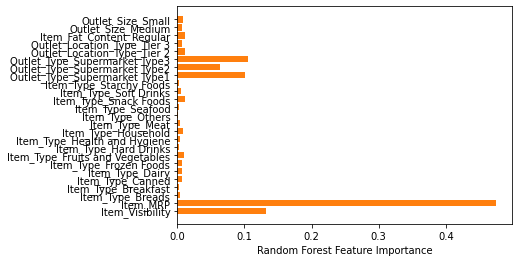

In [201]:
plt.barh(x_temp.columns.values, clf.feature_importances_).     #Thanks to https://towardsdatascience.com/the-3-ways-to-compute-feature-importance-in-the-random-forest-96c86b49e6d4
#plt.figure(figsize=(20, 5))  # width:20, height:3

sorted_idx = clf.feature_importances_.argsort()
plt.barh(x_temp.columns.values[sorted_idx], clf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance");


RECOMMENDATIONS:

1. From the data and visualisations, it is seen that products with 'Low Fat' Content generate more revenue than Regualr. It is recommended that if the numebr of products with Lower Fat content are increases, overall sales would go up.

2. Item Visibility is another factor which boosts the sales of the items. It would help if visibility of the low selling items is increased and it will be interesting to see if the sales increase for those items.

3. The factor that affects the most is the MRP of the item. MRP for some of the items can be increased to generate more sales. If the MRP is increased slightly, without causing the significant jump, it would not directly affect the consumer but in the long run, will give you more sales.